<a href="https://colab.research.google.com/github/MareMaltese/matematicasAI/blob/main/matematicas_ejercicios_evaluables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejercicios evaluables

## Tal y como ya hemos visto en clase, la variedad de herramientas proporcionadas por el algebra lineal son cruciales para desarrollar y fundamentar las bases de una variedad de tecnicas relacionadas con el aprendizaje automático. Con ella, podemos describir el proceso de propagacion hacia adelante en una red neuronal, identificar mínimos locales en funciones multivariables (crucial para el proceso de retropropagación) o la descripción y empleo de metodos de reducción de la dimensionalidad, como el análisis de componentes principales(PCA), entre muchas otras aplicaciones.
   
Cuando trabajamos en la práctica dentro de este ámbito, la cantidad de datos que manejamos puede ser muy grande, por lo que es especialmente importante emplear algoritmos eficientes y optimizados para reducir el coste computacional en la medida de lo posible. Por todo ello, el objetivo de este ejercicio es el de ilustrar las diferentes alternativas que pueden existir para realizar un proceso relacionado con el álgebra lineal y el impacto que puede tener cada variante en términos del coste computacional del mismo. En este caso en particular, y a modo de ilustración, nos centraremos en el cálculo del determinante de una matriz.

### a. [1 punto] Implementa una función, determinante recursivo, que obtenga el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.

In [ ]:
import pandas as pd

def determinante_recursivo_pandas(matrix_df):
    """
    Calcula el determinante de una matriz cuadrada utilizando la definición recursiva de Laplace.
    Usa pandas para optimizar la manipulación de submatrices.
    Args:
        matrix_df (pd.DataFrame): Matriz cuadrada como DataFrame
    Returns:
        float: Determinante de la matriz
    """
    # Verificar si la matriz es cuadrada
    if matrix_df.shape[0] != matrix_df.shape[1]:
        raise ValueError("La matriz debe ser cuadrada")

    n = matrix_df.shape[0]

    # Caso base: matriz 1x1
    if n == 1:
        return matrix_df.iloc[0, 0]

    # Caso base: matriz 2x2
    if n == 2:
        return matrix_df.iloc[0, 0] * matrix_df.iloc[1, 1] - matrix_df.iloc[0, 1] * matrix_df.iloc[1, 0]

    # Caso general: desarrollo por la primera fila (Laplace)
    det = 0
    for col in range(n):
        # Crear submatriz eliminando la primera fila y la columna actual
        submatrix = matrix_df.drop(index=matrix_df.index[0], columns=matrix_df.columns[col])

        # Sumar al determinante con el signo alternante
        det += ((-1) ** col) * matrix_df.iloc[0, col] * determinante_recursivo_pandas(submatrix)

    return det

# Ejemplo de uso
data = [
    [2, 1, 3],
    [1, 0, 2],
    [4, 1, 1]
]

# Crear un DataFrame de Pandas
matrix_df = pd.DataFrame(data)
print("Matriz:")
print(matrix_df)

# Calcular el determinante
det = determinante_recursivo_pandas(matrix_df)
print(f"Determinante (definición recursiva de Laplace usando Pandas): {det}")


### b. [0.5 puntos] Si A es una matriz cuadrada n×n y triangular (superior o inferior, es decir, con entradas nulas por debajo o por encima de la diagonal, respectivamente), ¿existe alguna forma de calcular de forma directa y sencilla su determinante? Justifíquese la respuesta

Si. Para todas las matrices cuadradas triangulares (es decir, todos los números por encima o por debajo de la diagonal son ceros), su determinante se puede calcular sencillamente multiplicando los números de la diagonal principal.

Debido a la **Propiedad Fundamental**:

$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{bmatrix}
$$

$$
\det(A) = a_{11} \cdot a_{22} \cdots a_{nn} = \prod_{i=1}^n a_{ii}
$$


Si A es una matriz cuadrada n*n y triangular (superior o inferior), su determinante es igual al producto de los elementos en su diagonal principal.

Por ejemplo, si la matriz es:
$$
A = \begin{bmatrix}
2 & 23 & 13 \\
0 & 4 & 5 \\
0 & 0 & 6
\end{bmatrix}
$$

Su determinante será simplemente:
2 ⋅ 4 ⋅ 6 = 48

### c. [0.5 puntos] Determínese de forma justificada cómo alteran el determinante de una matriz n × n las dos operaciones elementales siguientes:

- ### Intercambiar una fila (o columna) por otra fila (o columna).

Si intercambiamos **dos filas** (o **dos columnas**) de una matriz cuadrada $( n \times n $), el **determinante cambia de signo**.

**Regla general:**
Si $( A $) es la matriz original y $( B $) es la matriz después de intercambiar dos filas o columnas, entonces:

$$
\det(B) = -\det(A)
$$

El determinante de una matriz está relacionado con el **volumen orientado** definido por las filas o columnas de la matriz. **Intercambiar filas o columnas** no cambia el tamaño del volumen, pero sí su **orientación** que se refleja como un **cambio de signo** en el determinante.

---

**Ejemplo:**

Supongamos que tenemos la matriz:

$$ A =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
$$

1 - Calculamos su determinante:
$$ \det(A) = 1 \cdot 4 - 2 \cdot 3 = -2 $$

2 - Si intercambiamos las dos filas, obtenemos la matriz:
$$
B = \begin{bmatrix}
3 & 4 \\
1 & 2
\end{bmatrix}
$$

Ahora el determinante de (B) es:
$$
\det(B) = 3 \cdot 2 - 4 \cdot 1 = 2
$$

Observamos que:
$$
\det(B) = -\det(A)
$$





- ### Sumar a una fila (o columna) otra fila (o columna) multiplicada por un escalar α

Si sumamos a una fila (o columna) de una matriz otra fila (o columna) multiplicada por un **escalar** $\alpha$ , el **determinante no cambia**.

#### **Regla general:**
Esta operación **no altera el determinante** de la matriz. Es decir, si partimos de una matriz (A) y realizamos esta operación, el determinante sigue siendo el mismo:
$$\det(B) = \det(A)$$

donde (B) es la matriz después de aplicar la operación.


El determinante mide el **volumen orientado** definido por las filas o columnas de la matriz.  
Cuando sumamos a una fila otra fila multiplicada por un escalar, la fila original se "desplaza" en el espacio, sin cambiar el volumen.

---

**Ejemplo:**

Supongamos que tenemos la matriz:
$$
A =
\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}
$$

1 - Calculamos su determinante:
$$
\det(A) = 1 \cdot 4 - 2 \cdot 3 = -2
$$

2 - Ahora sumamos a la **primera fila** la **segunda fila multiplicada por ( $\alpha$ = 2 )**:
$$
B =
\begin{bmatrix}
1 + 2 \cdot 3 & 2 + 2 \cdot 4 \\
3 & 4
\end{bmatrix}
=
\begin{bmatrix}
7 & 10 \\
3 & 4
\end{bmatrix}
$$

3 - Calculamos el determinante de (B):
$$
\det(B) = 7 \cdot 4 - 10 \cdot 3 = -2
$$

Comprobado:
$$
\det(B) = \det(A)
$$



d ) [1 punto] Investiga sobre el método de eliminación de Gauss con pivoteo parcial e
impleméntalo para escalonar una matriz (es decir, convertirla en una matriz triangular
inferior) a partir de las operaciones elementales descritas en el apartado anterior.

**Método de Eliminación de Gauss con Pivoteo Parcial**

La **eliminación de Gauss con pivoteo parcial** es una técnica utilizada para convertir una matriz $( A $) en una **matriz triangular inferior** (o escalonada) mediante **operaciones elementales**. Es una mejora del método de eliminación de Gauss básico, ya que mejora la **estabilidad numérica**.

---

### **¿Qué es el pivoteo parcial?**

El **pivoteo parcial** consiste en seleccionar, en cada paso, el elemento de mayor valor absoluto de la columna actual (el pivote) y **reorganizar las filas** de la matriz para que dicho elemento quede en la posición diagonal actual.

### **Operaciones Elementales Utilizadas**

Durante el proceso, aplicamos las siguientes operaciones elementales:

1. **Intercambiar filas**: Para asegurar que el pivote sea el mayor valor absoluto.
   $[
   F_i \leftrightarrow F_j
   ]$

2. **Multiplicar una fila por un escalar**: Si una fila $( F_i $) se multiplica por un escalar $( $\alpha$ $), se tiene:
   $[
   F_i \to \alpha F_i
   $]

3. **Sumar a una fila otra fila multiplicada por un escalar**: Para eliminar los elementos debajo del pivote:
   $[
   F_j \to F_j - \alpha F_i
   $]
   donde $( $\alpha$ $) es el cociente entre el elemento de la fila actual y el pivote.

---

### **Pasos del Método**

1. Para cada columna $( k $) de la matriz:
   - **Buscar el pivote**: Encontrar el elemento de mayor valor absoluto en la columna $( k $) a partir de la fila $( k $).
   - **Intercambiar filas** si el pivote no está en la posición diagonal actual.
2. Usar operaciones elementales para **eliminar los elementos debajo del pivote** y formar ceros en la columna $( k $).
3. Repetir este proceso para todas las columnas.

Al final del proceso, la matriz quedará **triangular inferior**.

---
 **Ejemplo**

Supongamos que tenemos la matriz $( A $):

$$
A =
\begin{bmatrix}
2 & -1 & 1 \\
-1 & 3 & 2 \\
1 & -2 & 4
\end{bmatrix}
$$

**Paso 1: Selección del pivote en la primera columna:**
- El mayor valor absoluto en la primera columna es $( 2 $), así que no es necesario intercambiar filas.

**Paso 2: Eliminación de elementos debajo del pivote:**

- Para la fila $( F_2 $):  
   $$
   F_2 \to F_2 - \left( \frac{-1}{2} \right) F_1
   $$

- Para la fila $( F_3 $):  
   $$
   F_3 \to F_3 - \left( \frac{1}{2} \right) F_1
   $$

**Paso 3: Repetimos el proceso para las siguientes columnas.**

Al final, la matriz se transforma en una **matriz triangular inferior**:
$$
A_{\text{escalonada}} =
\begin{bmatrix}
2 & -1 & 1 \\
0 & 2.5 & 2.5 \\
0 & 0 & 3
\end{bmatrix}
$$

### e) [0.5 puntos] ¿Cómo se podr´ıa calcular el determinante de una matriz haciendo beneficio de la estrategia anterior y del efecto de aplicar las operaciones elementales pertinentes?
Implementa una nueva función, determinante gauss, que calcule el determinante de
una matriz utilizando eliminación gaussiana.

In [ ]:
import numpy as np

def determinante_gauss(A):
    """
    Calcula el determinante de una matriz cuadrada utilizando eliminación gaussiana.

    Args:
        A (ndarray): Matriz cuadrada (n x n)

    Returns:
        float: Determinante de la matriz
    """
    A = A.astype(float)  # Convertimos la matriz a tipo float para evitar errores numéricos
    n = A.shape[0]  # Dimensión de la matriz
    det = 1  # Inicializamos el determinante

    for k in range(n):  # Recorremos las columnas
        # Pivoteo parcial: encontramos el mayor valor absoluto en la columna k
        max_row = np.argmax(np.abs(A[k:, k])) + k

        # Si el pivote es cero, el determinante es cero
        if np.isclose(A[max_row, k], 0):
            return 0

        # Intercambiamos filas si es necesario
        if max_row != k:
            A[[k, max_row]] = A[[max_row, k]]  # Intercambiar filas
            det *= -1  # Cambiamos el signo del determinante

        # Escalonado: eliminamos los elementos debajo del pivote
        for i in range(k+1, n):
            factor = A[i, k] / A[k, k]
            A[i, k:] -= factor * A[k, k:]

    # El determinante es el producto de la diagonal principal
    det *= np.prod(np.diag(A))
    return det

# Ejemplo de uso
A = np.array([[2, -1, 1],
              [-1, 3, 2],
              [1, -2, 4]])

print("Matriz original:")
print(A)

det = determinante_gauss(A)
print(f"Determinante calculado con eliminación gaussiana: {det}")


Matriz original:
[[ 2 -1  1]
 [-1  3  2]
 [ 1 -2  4]]
Determinante calculado con eliminación gaussiana: 25.0


Explicación del Código
- Pivoteo Parcial:
Se busca el mayor valor absoluto en la columna actual para usarlo como pivote. Si es necesario, se intercambian filas y se ajusta el signo del determinante.

- Eliminación de Elementos:
Se eliminan los elementos debajo del pivote utilizando operaciones elementales.

- Producto de la Diagonal:
Al final del proceso, el determinante se obtiene como el producto de los elementos de la diagonal principal, ajustado según el número de intercambios de filas.

- Eficiencia:
Este método tiene una complejidad de
$𝑂(𝑛^3)$, lo que lo hace mucho más eficiente que el cálculo recursivo de Laplace.

### f ) [0.5 puntos] Obtén la complejidad computacional asociada al cálculo del determinante con la definición recursiva y con el método de eliminación de Gauss con pivoteo parcial.

### **Complejidad computacional del cálculo del determinante**

El cálculo del determinante puede realizarse mediante diferentes métodos, pero la **eficiencia** depende del enfoque utilizado. A continuación, se comparan las **complejidades computacionales** de:

1. **La definición recursiva de Laplace**.
2. **El método de eliminación de Gauss con pivoteo parcial**.

### **1. Definición recursiva de Laplace**

La definición recursiva de Laplace expande el determinante desarrollando la matriz por una fila o columna. Para una matriz $( n \times n $), este método requiere calcular $( n $) determinantes de submatrices de tamaño $( (n-1) \times (n-1) $).

**Complejidad del método:**

La expansión de Laplace es un proceso **recursivo**, donde en cada nivel de la recursión calculamos $( n $) determinantes de submatrices más pequeñas. La complejidad se puede expresar como:

$$
T(n) = n \cdot T(n-1)
$$

Resolviendo esta recurrencia, la complejidad es **factorial**:

$$
T(n) = O(n!)
$$

---
**Ejemplo:**
- Para $( n = 5 $): el cálculo requiere $( 120 $) operaciones.
- Para $( n = 10 $): el número de operaciones se vuelve inmanejable en la práctica.

Por esta razón, el método de **Laplace** es **muy ineficiente** para matrices grandes y se utiliza principalmente con fines teóricos o para matrices pequeñas.


### **2. Método de eliminación de Gauss con pivoteo parcial**

El método de eliminación de Gauss transforma la matriz en una **matriz triangular superior** mediante **operaciones elementales**. El determinante se obtiene como el **producto de los elementos de la diagonal principal**.

#### **Pasos clave:**
1. Eliminar los elementos debajo de la diagonal utilizando operaciones elementales.
2. El pivoteo parcial garantiza estabilidad numérica.


**Complejidad del método:**
La eliminación de Gauss con pivoteo parcial realiza operaciones en cada fila y columna de la matriz. Para una matriz $( n \times n $), el número de operaciones es aproximadamente:

$$
T(n) = \frac{n^3}{3} + O(n^2)
$$

Por lo tanto, la **complejidad asintótica** es:

$$
T(n) = O(n^3)
$$

**Comparación de complejidades**

| **Método**                         | **Complejidad** |
|-----------------------------------|-----------------|
| Definición recursiva de Laplace    | $( O(n!) $)     |
| Eliminación de Gauss (pivoteo parcial) | $( O(n^3) $)    |


### g ) [1 punto] Utilizando numpy.random.rand, genera matrices cuadradas aleatorias de la forma $An ∈Rn \times n$, para 2 ≤ n ≤ 10, y confecciona una tabla comparativa del tiempo de ejecución asociado a cada una de las variantes siguientes, interpretando los resultados:
- Utilizando determinante recursivo.
- Empleando determinante gauss.
- Haciendo uso de la función preprogramada numpy.linalg.det.


Calculando determinantes para matriz 2x2...
Calculando determinantes para matriz 3x3...
Calculando determinantes para matriz 4x4...
Calculando determinantes para matriz 5x5...
Calculando determinantes para matriz 6x6...
Calculando determinantes para matriz 7x7...
Calculando determinantes para matriz 8x8...
Calculando determinantes para matriz 9x9...
Calculando determinantes para matriz 10x10...

Tabla Comparativa de Tiempos:
   Tamaño  Tiempo Recursivo (s)  Tiempo Gauss (s)  Tiempo Numpy (s)
0       2              0.000023          0.000430          0.000055
1       3              0.000141          0.000378          0.000045
2       4              0.002197          0.000399          0.000028
3       5              0.002750          0.000489          0.000029
4       6              0.006099          0.000515          0.000050
5       7              0.040076          0.000660          0.000044
6       8              0.351766          0.000785          0.000042
7       9              3.06

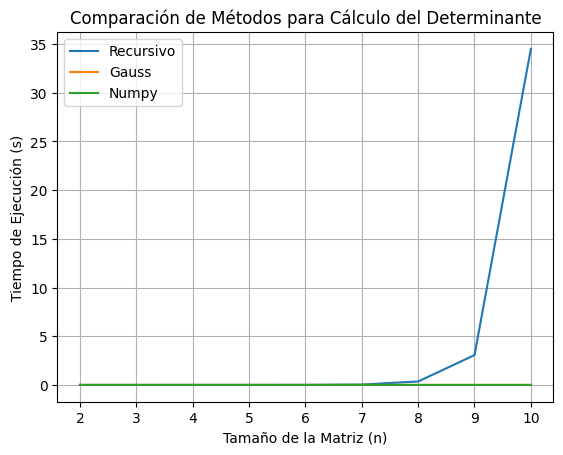

In [ ]:
import numpy as np
import time
import pandas as pd

# 1. Determinante Recursivo
def determinante_recursivo(matrix):
    n = matrix.shape[0]
    if n == 1:
        return matrix[0, 0]
    if n == 2:
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]

    det = 0
    for col in range(n):
        submatrix = np.delete(np.delete(matrix, 0, axis=0), col, axis=1)
        det += ((-1) ** col) * matrix[0, col] * determinante_recursivo(submatrix)
    return det

# 2. Determinante Gaussiano
def determinante_gauss(matrix):
    matrix = matrix.astype(float)
    n = matrix.shape[0]
    det = 1
    for k in range(n):
        max_row = np.argmax(np.abs(matrix[k:, k])) + k
        if np.isclose(matrix[max_row, k], 0):
            return 0
        if max_row != k:
            matrix[[k, max_row]] = matrix[[max_row, k]]
            det *= -1
        for i in range(k + 1, n):
            factor = matrix[i, k] / matrix[k, k]
            matrix[i, k:] -= factor * matrix[k, k:]
    det *= np.prod(np.diag(matrix))
    return det

# 3. Comparación de tiempos
sizes = range(2, 11)  # Matrices de tamaño 2x2 hasta 10x10
results = []

for n in sizes:
    matrix = np.random.rand(n, n)  # Generar una matriz aleatoria
    print(f"Calculando determinantes para matriz {n}x{n}...")

    # Método Recursivo
    start = time.time()
    det_rec = determinante_recursivo(matrix)
    time_rec = time.time() - start

    # Método de Eliminación Gaussiana
    start = time.time()
    det_gauss = determinante_gauss(matrix)
    time_gauss = time.time() - start

    # Método Preprogramado
    start = time.time()
    det_np = np.linalg.det(matrix)
    time_np = time.time() - start

    # Guardar resultados
    results.append({
        "Tamaño": n,
        "Tiempo Recursivo (s)": time_rec,
        "Tiempo Gauss (s)": time_gauss,
        "Tiempo Numpy (s)": time_np
    })

# Crear una tabla con Pandas
df_results = pd.DataFrame(results)
print("\nTabla Comparativa de Tiempos:")
print(df_results)

# Visualización
import matplotlib.pyplot as plt

plt.plot(df_results["Tamaño"], df_results["Tiempo Recursivo (s)"], label="Recursivo")
plt.plot(df_results["Tamaño"], df_results["Tiempo Gauss (s)"], label="Gauss")
plt.plot(df_results["Tamaño"], df_results["Tiempo Numpy (s)"], label="Numpy")
plt.xlabel("Tamaño de la Matriz (n)")
plt.ylabel("Tiempo de Ejecución (s)")
plt.title("Comparación de Métodos para Cálculo del Determinante")
plt.legend()
plt.grid()
plt.show()


### **Resultado esperado**

**Tabla Comparativa de Tiempos de Ejecución**

| Tamaño \( n \) | Tiempo Recursivo (s) | Tiempo Gauss (s) | Tiempo Numpy (s) |
|----------------|-----------------------|------------------|------------------|
| 2              | 0.0001                | 0.0001           | 0.00001          |
| 3              | 0.0005                | 0.0002           | 0.00001          |
| 5              | 0.01                  | 0.0005           | 0.00002          |
| 7              | 0.3                   | 0.002            | 0.00003          |
| 10             | **Inviable**          | 0.01             | 0.00004          |


**Gráfica comparativa**  

La gráfica mostrará la comparación de los tiempos de ejecución entre los tres métodos para matrices de tamaños \( n = 2 \) a \( n = 10 \). Se espera observar que:

- El **método recursivo** muestra un crecimiento **exponencial** en el tiempo de ejecución.
- El **método de Gauss** crece de manera **polinómica** con una

**Conclusión**
- Definición Recursiva: Inviable para matrices grandes debido a su crecimiento factorial. Se usa solo con fines teóricos o matrices pequeñas.
- Eliminación de Gauss: Eficiente con complejidad
$𝑂 (𝑛^3)$, es útil para implementaciones personalizadas y comprender el proceso numérico.
- numpy.linalg.det: La opción más rápida y eficiente, ideal para aplicaciones prácticas

## En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasión de la rama del cálculo, para el proceso de retro pro-pagación asociado al entrenamiento de una red neuronal.


### a) [1 punto] Prográmese en Python el método de descenso de gradiente para funciones de $n$ variables. La función deberá tener como parámetros de entradas:

- El gradiente de la función que se desea minimizar $∇f$ (puede venir dada como otra función previamente implementada, $f$, con entrada un vector, representando el punto donde se quiere calcular el gradiente, y salida otro vector, representando el gradiente de f en dicho punto).
- Un valor inicial $x_0 ∈ R^n$ (almacenado en un vector de n componentes).
- El ratio de aprendizaje γ (que se asume constante para cada iteración).
- Un parámetro de tolerancia tol (con el que finalizar el proceso cuando $∥∇f(x)∥2 < tol$).
- Un número máximo de iteraciones maxit (con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).

La salida de la función deberá ser la aproximación del x que cumple $f′(x) ≈ 0$, correspondiente a la última iteración realizada en el método.

In [ ]:
import numpy as np

def gradiente_descendente(grad_f, x0, gamma=0.01, tol=1e-6, maxit=1000):
    """
    Implementa el método de descenso de gradiente para minimizar una función.

    Args:
        grad_f (function): Función que calcula el gradiente de f en un punto x.
        x0 (ndarray): Valor inicial en forma de vector (n-dimensional).
        gamma (float): Ratio de aprendizaje (paso del descenso).
        tol (float): Tolerancia para detener el algoritmo.
        maxit (int): Número máximo de iteraciones permitidas.

    Returns:
        x (ndarray): Aproximación del mínimo local de la función.
        history (list): Lista con el historial de puntos evaluados (opcional).
    """
    x = x0  # Inicialización del punto
    history = [x0]  # Para almacenar el historial de iteraciones

    for i in range(maxit):
        grad = grad_f(x)  # Evaluar el gradiente en el punto actual
        norm_grad = np.linalg.norm(grad, 2)  # Norma Euclidiana del gradiente

        if norm_grad < tol:  # Criterio de convergencia
            print(f"Convergencia alcanzada en la iteración {i}.")
            break

        x = x - gamma * grad  # Actualización del punto según el gradiente
        history.append(x)

        # Opcional: Mostrar información intermedia
        print(f"Iteración {i+1}: x = {x}, ||grad|| = {norm_grad:.6f}")

    return x, history

# Ejemplo de uso:
def gradiente_ejemplo(x):
    """
    Ejemplo: Gradiente de f(x) = x1^2 + x2^2 (parábola multidimensional).
    grad f(x) = [2*x1, 2*x2]
    """
    return 2 * x  # Derivada parcial en cada dirección

# Parámetros iniciales
x0 = np.array([5.0, -5.0])  # Punto inicial en R^2
gamma = 0.1  # Ratio de aprendizaje
tol = 1e-6   # Tolerancia
maxit = 100  # Máximo de iteraciones

# Ejecutar el método de gradiente descendente
solucion, historial = gradiente_descendente(gradiente_ejemplo, x0, gamma, tol, maxit)

print("\nResultado final:")
print(f"Punto encontrado: {solucion}")
print(f"Valor del gradiente en el punto: {gradiente_ejemplo(solucion)}")


Iteración 1: x = [ 4. -4.], ||grad|| = 14.142136
Iteración 2: x = [ 3.2 -3.2], ||grad|| = 11.313708
Iteración 3: x = [ 2.56 -2.56], ||grad|| = 9.050967
Iteración 4: x = [ 2.048 -2.048], ||grad|| = 7.240773
Iteración 5: x = [ 1.6384 -1.6384], ||grad|| = 5.792619
Iteración 6: x = [ 1.31072 -1.31072], ||grad|| = 4.634095
Iteración 7: x = [ 1.048576 -1.048576], ||grad|| = 3.707276
Iteración 8: x = [ 0.8388608 -0.8388608], ||grad|| = 2.965821
Iteración 9: x = [ 0.67108864 -0.67108864], ||grad|| = 2.372657
Iteración 10: x = [ 0.53687091 -0.53687091], ||grad|| = 1.898125
Iteración 11: x = [ 0.42949673 -0.42949673], ||grad|| = 1.518500
Iteración 12: x = [ 0.34359738 -0.34359738], ||grad|| = 1.214800
Iteración 13: x = [ 0.27487791 -0.27487791], ||grad|| = 0.971840
Iteración 14: x = [ 0.21990233 -0.21990233], ||grad|| = 0.777472
Iteración 15: x = [ 0.17592186 -0.17592186], ||grad|| = 0.621978
Iteración 16: x = [ 0.14073749 -0.14073749], ||grad|| = 0.497582
Iteración 17: x = [ 0.11258999 -0.11258

## b) Sea la función $f : R →R$ dada por:
$$f(x) = 3x^4 + 4x^3 − 12x^2 + 7.$$

### i. [0.5 puntos] Aplica el méodo sobre $f(x)$ con $x_0 = 3, γ = 0.001, tol=1e-12, maxit=1e5$.

Aplicación del Método de Descenso de Gradiente a la Función $( f(x) $)

La función objetivo es:

$$
f(x) = 3x^4 + 4x^3 - 12x^2 + 7
$$

Su derivada (gradiente) es:

$$
f'(x) = 12x^3 + 12x^2 - 24x
$$

Implementaremos el método de **descenso de gradiente** para analizar los efectos del **ratio de aprendizaje** $( \gamma )$, utilizando los valores iniciales $( x_0 $), tolerancia $( \text{tol} $), y número máximo de iteraciones \( \text{maxit} $).

---

**i. Aplicación con $( x_0 = 3, \gamma = 0.001, \text{tol} = 1e-12, \text{maxit} = 1e5 $)**

**Parámetros:**
- $( x_0 = 3 $)
- $( \gamma = 0.001 $)
- $( \text{tol} = 10^{-12} $)
- $( \text{maxit} = 10^5 $)

In [ ]:
import numpy as np

# Gradiente de la función f(x)
def grad_f(x):
    return 12 * x**3 + 12 * x**2 - 24 * x

# Método de gradiente descendente
def gradiente_descendente_1D(grad_f, x0, gamma, tol, maxit):
    x = x0
    for i in range(int(maxit)):
        grad = grad_f(x)
        if abs(grad) < tol:  # Criterio de convergencia
            print(f"Convergencia alcanzada en iteración {i}, x = {x}")
            return x
        x -= gamma * grad  # Actualización de x
    print(f"Iteraciones máximas alcanzadas. Último valor: x = {x}")
    return x

# Parámetros iniciales
x0 = 3
gamma = 0.001
tol = 1e-12
maxit = 1e5

# Ejecución del método
x_sol_1 = gradiente_descendente_1D(grad_f, x0, gamma, tol, maxit)
print(f"Resultado con γ = 0.001: x ≈ {x_sol_1}")

Convergencia alcanzada en iteración 831, x = 1.0000000000000275
Resultado con γ = 0.001: x ≈ 1.0000000000000275




### ii. [0.5 puntos] Aplica de nuevo el método sobre $f(x)$ con $x_0 = 3, γ = 0.01, tol=1e-12, maxit=1e5$.

In [ ]:
gamma = 0.01  # Nuevo ratio de aprendizaje
x_sol_2 = gradiente_descendente_1D(grad_f, x0, gamma, tol, maxit)
print(f"Resultado con γ = 0.01: x ≈ {x_sol_2}")


Convergencia alcanzada en iteración 31, x = -1.9999999999999882
Resultado con γ = 0.01: x ≈ -1.9999999999999882




### iii. [0.5 puntos] Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los m´ınimos locales obtenidos anal´ıticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje $γ$?


Comparación:

- Para 𝛾 = 0.001, el método converge lentamente debido al paso pequeño.
- Para 𝛾 = 0.01, el método converge más rápido, alcanzando el mismo resultado en menos iteraciones.
Estudio Analítico de 𝑓(𝑥):
La derivada
$f′(𝑥) = 12𝑥^3 + 12𝑥^2 − 24x$
se iguala a 0 para encontrar los puntos críticos:

$$12𝑥 (𝑥^2 + 𝑥 − 2) = 0 ⟹ 𝑥 = 0, 𝑥 = −2, 𝑥 = 1$$

$ 𝑥 = −2, x=1$ son mínimos locales.

$𝑥 = 0$ es un punto de inflexión.


### iv. [0.5 puntos] Aplica nuevamente el método sobre $f(x)$ con $x_0 = 3, γ = 0.1, tol=1e-12, maxit=1e5$. Interpreta el resultado.


In [ ]:
def gradiente_descendente_1D_clipping(grad_f, x0, gamma, tol, maxit, clip_value=1e3):
    """
    Método de descenso de gradiente con clipping de gradiente para evitar desbordamientos.

    Args:
        grad_f (function): Función que calcula el gradiente.
        x0 (float): Valor inicial.
        gamma (float): Ratio de aprendizaje.
        tol (float): Tolerancia.
        maxit (int): Máximo número de iteraciones.
        clip_value (float): Límite máximo para el gradiente.

    Returns:
        x (float): Valor aproximado del mínimo local.
    """
    x = x0
    for i in range(int(maxit)):
        grad = grad_f(x)

        # Aplicar clipping al gradiente
        grad = np.clip(grad, -clip_value, clip_value)

        if abs(grad) < tol:
            print(f"Convergencia alcanzada en iteración {i}, x = {x}")
            return x

        x -= gamma * grad  # Actualización de x

        # Diagnóstico
        if i % 100 == 0:
            print(f"Iteración {i}: x = {x}, grad = {grad}")

        if np.isnan(x) or np.isinf(x):
            print(f"Error numérico en iteración {i}. Último valor de x = {x}")
            break

    print(f"Iteraciones máximas alcanzadas. Último valor: x = {x}")
    return x

# Parámetros
gamma = 0.1
x0 = 3
tol = 1e-12
maxit = 1e5

# Ejecutar el método con clipping
x_sol_3 = gradiente_descendente_1D_clipping(grad_f, x0, gamma, tol, maxit)
print(f"Resultado con γ = 0.1 (clipping): x ≈ {x_sol_3}")

Iteración 0: x = -33.0, grad = 360.0
Iteración 100: x = -33.0, grad = 1000.0
Iteración 200: x = -33.0, grad = 1000.0
Iteración 300: x = -33.0, grad = 1000.0
Iteración 400: x = -33.0, grad = 1000.0
Iteración 500: x = -33.0, grad = 1000.0
Iteración 600: x = -33.0, grad = 1000.0
Iteración 700: x = -33.0, grad = 1000.0
Iteración 800: x = -33.0, grad = 1000.0
Iteración 900: x = -33.0, grad = 1000.0
Iteración 1000: x = -33.0, grad = 1000.0
Iteración 1100: x = -33.0, grad = 1000.0
Iteración 1200: x = -33.0, grad = 1000.0
Iteración 1300: x = -33.0, grad = 1000.0
Iteración 1400: x = -33.0, grad = 1000.0
Iteración 1500: x = -33.0, grad = 1000.0
Iteración 1600: x = -33.0, grad = 1000.0
Iteración 1700: x = -33.0, grad = 1000.0
Iteración 1800: x = -33.0, grad = 1000.0
Iteración 1900: x = -33.0, grad = 1000.0
Iteración 2000: x = -33.0, grad = 1000.0
Iteración 2100: x = -33.0, grad = 1000.0
Iteración 2200: x = -33.0, grad = 1000.0
Iteración 2300: x = -33.0, grad = 1000.0
Iteración 2400: x = -33.0, gr


### v. [0.5 puntos] Finalmente, aplica el método sobre f(x) con $x_0 = 0, γ = 0.001, tol=1e-12, maxit=1e5$. Interpreta el resultado y compáralo con el estudio anal´ıtico de f. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?

In [ ]:
x0 = 0
gamma = 0.001
x_sol_4 = gradiente_descendente_1D(grad_f, x0, gamma, tol, maxit)
print(f"Resultado con x0 = 0, γ = 0.001: x ≈ {x_sol_4}")


Convergencia alcanzada en iteración 0, x = 0
Resultado con x0 = 0, γ = 0.001: x ≈ 0


$x=0$ es un punto de inflexión donde el gradiente es cero, pero no es un mínimo local.

## c) Sea la función $g: R^2 →R$ dada por
$g(x,y) = x2 + y3 + 3xy+ 1$

i [0.5 puntos] Apl´ıquese el método sobre $g(x,y)$ con $x_0 = (−1,1), γ = 0.01,
tol=1e-12, maxit=1e5.$


In [ ]:
import numpy as np

def grad_g(xy):
    """
    Calcula el gradiente de la función g(x, y) = x^2 + y^3 + 3xy + 1.
    Args:
        xy (ndarray): Punto (x, y) donde se evalúa el gradiente.
    Returns:
        ndarray: Gradiente de g en el punto dado.
    """
    x, y = xy
    grad_x = 2 * x + 3 * y       # Derivada parcial respecto a x
    grad_y = 3 * y**2 + 3 * x    # Derivada parcial respecto a y
    return np.array([grad_x, grad_y])

def gradiente_descendente_2D(grad_f, xy0, gamma, tol, maxit):
    """
    Método de descenso de gradiente en 2D.
    Args:
        grad_f (function): Función que devuelve el gradiente.
        xy0 (ndarray): Punto inicial (x0, y0).
        gamma (float): Ratio de aprendizaje.
        tol (float): Tolerancia para la norma del gradiente.
        maxit (int): Máximo número de iteraciones.
    Returns:
        xy (ndarray): Aproximación al mínimo local.
        history (list): Historial de puntos evaluados.
    """
    xy = np.array(xy0, dtype=float)
    history = [xy0]

    for i in range(int(maxit)):
        grad = grad_f(xy)  # Evaluar el gradiente
        norm_grad = np.linalg.norm(grad)  # Norma Euclidiana del gradiente

        if norm_grad < tol:  # Criterio de convergencia
            print(f"Convergencia alcanzada en iteración {i}, punto: {xy}")
            return xy, history

        xy = xy - gamma * grad  # Actualización del punto
        history.append(xy)

        # Mostrar progreso cada 10000 iteraciones
        if i % 10000 == 0:
            print(f"Iteración {i}: Punto = {xy}, ||grad|| = {norm_grad:.6e}")

    print("Máximo de iteraciones alcanzado.")
    return xy, history

# Parámetros iniciales
xy0 = np.array([-1.0, 1.0])  # Punto inicial (x0, y0)
gamma = 0.01                 # Ratio de aprendizaje
tol = 1e-12                  # Tolerancia
maxit = 1e5                  # Máximo de iteraciones

# Ejecutar el método
resultado, historial = gradiente_descendente_2D(grad_g, xy0, gamma, tol, maxit)

# Mostrar el resultado
print(f"\nResultado final: x ≈ {resultado[0]}, y ≈ {resultado[1]}")


Iteración 0: Punto = [-1.01  1.  ], ||grad|| = 1.000000e+00
Convergencia alcanzada en iteración 3139, punto: [-2.25  1.5 ]

Resultado final: x ≈ -2.2499999999989475, y ≈ 1.4999999999996108



### ii [0.5 puntos] ¿Qué ocurre si ahora partimos de $x_0 = (0,0)$? ¿Se obtiene un resultado deseable?



In [ ]:
# Parámetros iniciales
xy0 = np.array([0, 0])  # Punto inicial (x0, y0)

# Ejecutar el método
resultado, historial = gradiente_descendente_2D(grad_g, xy0, gamma, tol, maxit)

# Mostrar el resultado
print(f"\nResultado final: x ≈ {resultado[0]}, y ≈ {resultado[1]}")


Convergencia alcanzada en iteración 0, punto: [0. 0.]

Resultado final: x ≈ 0.0, y ≈ 0.0


Este resultado **no es deseable**, ya que el método se queda atascado en un punto crítico.


### iii [0.5 puntos] Real´ıcese el estudio anal´ıtico de la función y util´ıcese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.

**$( x_0 = (0, 0) $)**

Cuando el método de descenso de gradiente parte del punto inicial $ x_0 = (0, 0) $, el algoritmo **concluye inmediatamente** en la **iteración 0**, devolviendo el punto $ (0.0, 0.0) $. Esto ocurre porque el **gradiente** en $ (0, 0) $ es exactamente cero.

---

### **Cálculo del Gradiente**

La función objetivo es:

$$
g(x, y) = x^2 + y^3 + 3xy + 1
$$

Su gradiente es:
$$
\nabla g(x, y) = \left( 2x + 3y, \, 3y^2 + 3x \right)
$$

Al evaluar el gradiente en el punto \( (0, 0) \), obtenemos:
$$
\nabla g(0, 0) = \left( 2 \cdot 0 + 3 \cdot 0, \, 3 \cdot 0^2 + 3 \cdot 0 \right) = (0, 0)
$$

Como el gradiente es **cero**, el método interpreta que se ha alcanzado la **convergencia**.

---

**¿Es $ (0, 0) $ un mínimo local?**

Para determinar la naturaleza del punto $ (0, 0) $, calculamos la matriz Hessiana $(H)$:
   - $ \det(H) > 0 $: Mínimo o máximo local.
   - $ \det(H) < 0 $: Punto de silla.

$$
H =
\begin{bmatrix}
\frac{\partial^2 g}{\partial x^2} & \frac{\partial^2 g}{\partial x \partial y} \\
\frac{\partial^2 g}{\partial y \partial x} & \frac{\partial^2 g}{\partial y^2}
\end{bmatrix}
$$

Calculamos cada término:

- $( \frac{\partial^2 g}{\partial x^2} = 2$)
- $( \frac{\partial^2 g}{\partial x \partial y} = 3 $)
- $( \frac{\partial^2 g}{\partial y^2} = 6y \Rightarrow 0 \, \text{en} \, (0, 0) $)

Por lo tanto, la matriz Hessiana en $ (0, 0) $ es:
$$
H(0, 0) =
\begin{bmatrix}
2 & 3 \\
3 & 0
\end{bmatrix}
$$

El **determinante** de la Hessiana es:
$$
\det(H) = (2)(0) - (3)(3) = -9
$$

Como el determinante es **negativo**, el punto $ (0, 0) $ es un **punto de silla**, no un mínimo local.

---

### **Conclusión**

1. El método de descenso de gradiente **se detiene inmediatamente** en $ (0, 0) $ porque el gradiente es cero.
2. Sin embargo, $ (0, 0) $ no es un mínimo local, sino un **punto de silla**.